In [2]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
import time

import sys

from scipy import interpolate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
TbPk_hydro = Table.read("Pk_eagle_hydro_shotcor.fits")
TbPk_dmo   = Table.read("Pk_eagle_DMO_shotcor.fits")
TblogPkRatio = Table.read("logPkRatio_eagle.fits")

In [4]:
TbPk_hydro[0:5]

avgk,Nk1024,Pk011,Pk012,Pk013,Pk014,Pk015,Pk016,Pk017,Pk018,Pk019,Pk021,Pk023,Pk025,Pk028
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.186910571364,80.0,183.752590757,233.659982612,311.302725826,358.998647087,413.657479981,498.83276685,599.971990897,719.071424221,895.775014447,1150.60004513,1450.66464089,1846.92773784,2451.81022455
0.369471621859,404.0,49.3534749458,63.1018101388,84.8322092347,98.3897290171,114.124011757,139.076425511,169.407622592,206.152042403,262.959431845,350.594918326,464.736543581,640.249061994,976.448964013
0.580970558471,1162.0,21.6633788083,28.2712446857,39.227360971,46.3810153514,54.982870872,69.2555859665,87.4897693327,110.508267873,147.048105459,202.452995994,269.726838954,367.692817042,575.499884865
0.801922715532,2240.0,11.3643213437,14.9770543363,21.0551786159,25.0835965737,29.9946434859,38.3012394018,49.2139153068,63.5037509395,87.5489858617,127.102633547,178.160372734,252.08256055,414.402565255
1.02174096835,3554.0,7.04756966906,9.48949966515,13.6919850097,16.5382180688,20.0804733669,26.2637803958,34.7327282952,46.3070593339,66.4554308958,98.8377706206,138.095347585,194.508992447,325.042073821


Pk011 -> Pk computed from eagle snapshot_ID 11 

Pk012 -> Pk computed from eagle snapshot_ID 12 

Below is the snapshotID and redshift information

In [5]:
Snap_ID_list   = [    11,    12,    13,    14,    15,    16,    17,    18,    19,    21,    23,    25,   28 ]
redshift_list  = [  3.53,  3.02,  2.48,  2.24,  2.01,  1.74,  1.49,  1.26,  1.00,  0.74,  0.50,  0.27,  0.00]
colname_list   = ["z353","z302","z248","z224","z201","z174","z149","z126","z100","z074","z050","z027","z000"]

In [5]:
TblogPkRatio[0:5]

logk,z353,z302,z248,z224,z201,z174,z149,z126,z100,z074,z050,z027,z000
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-3.30102999566,1.02765169557e-25,0.0,2.56912923892e-26,-2.56912923892e-26,0.0,-2.05530339113e-25,-2.05530339113e-25,-4.11060678227e-25,-6.1659101734e-25,0.0,-8.22121356454e-25,-4.11060678227e-25,-4.11060678227e-25
-3.16648775878,-4.12563914225e-09,-3.10656910261e-09,-8.82066852032e-10,5.64980794688e-10,1.56843377129e-09,3.47942374792e-09,5.24517205702e-09,7.47482145119e-09,9.16889572137e-09,1.03200922164e-08,1.22735122566e-08,1.37886294142e-08,1.66618264382e-08
-3.0319455219,-1.58324787997e-09,-1.19217138875e-09,-3.38500393593e-10,2.16816016761e-10,6.01899331876e-10,1.33525741891e-09,2.01287782403e-09,2.86852407778e-09,3.51863898224e-09,3.96042008509e-09,4.71006105723e-09,5.29149970104e-09,6.39411263932e-09
-2.89740328502,7.62717378683e-09,5.74319314157e-09,1.63069937532e-09,-1.04449433378e-09,-2.89960331826e-09,-6.43249898704e-09,-9.69688269897e-09,-1.38188921202e-08,-1.69507702174e-08,-1.9079016394e-08,-2.26903535981e-08,-2.54913891396e-08,-3.08031413966e-08
-2.76286104813,1.24491611967e-08,9.37410621571e-09,2.66164636523e-09,-1.70483572208e-09,-4.73276604473e-09,-1.04991991825e-08,-1.58273640013e-08,-2.25553554138e-08,-2.7667243037e-08,-3.11409910411e-08,-3.70354573593e-08,-4.16073399396e-08,-5.02772433577e-08


# Plot

In [8]:
Lbox =  67.77    # simulation box for eagle is 67.77 Mpc/h
k_Ny_dmo = np.pi*1024/Lbox    # Niquest freq. for DMO sim. of eagle   (1024**3 ptls)
k_Ny_hydro = np.pi*1504/Lbox  # Niquest freq. for hydro sim. of eagle (1504**3 ptls)

In [16]:
snap = 28
zcol = "z000"

(0.5, 1.5)

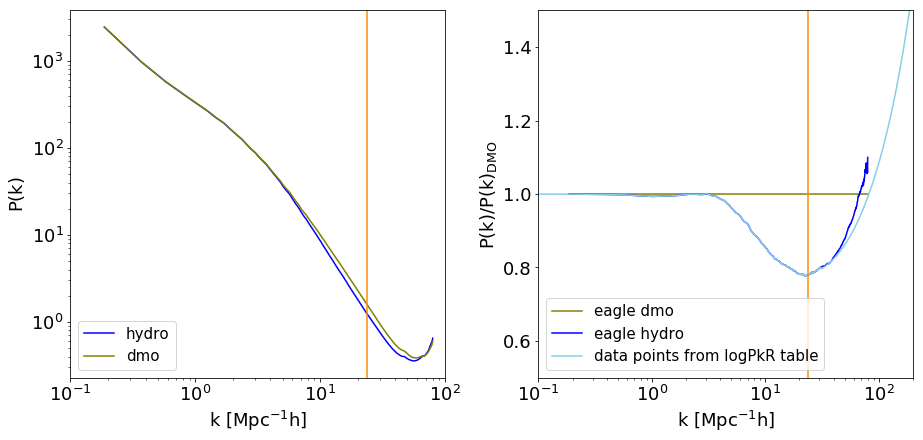

In [25]:
fig=plt.figure(figsize=(13,6))
plt.rc('text', usetex=False)      
plt.rc('font',size=18) 

ax1=fig.add_axes([0.07 ,0.13,0.4,0.85])
ax2=fig.add_axes([0.57 ,0.13,0.4,0.85])

Pkcol = "Pk%03d"%snap

avgk    = TbPk_hydro["avgk"]
Nk      = TbPk_hydro["Nk1024"]
Pk_hydro=TbPk_hydro[Pkcol]
Pk_dmo  =TbPk_dmo[Pkcol]

logk    = TblogPkRatio["logk"]
logPkR  = TblogPkRatio[zcol]

ax1.plot(avgk,Pk_hydro,c='blue',label="hydro")
ax1.plot(avgk,Pk_dmo  ,c='olive' ,label='dmo')

ax1.axvline(x=k_Ny_dmo/2., color='darkorange', linestyle='-')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')   
ax1.set_ylabel(r'$\mathrm{P(k)}$')
ax1.set_xlim(0.1,100)

ax1.legend(loc="lower left",prop={'size': 15})


ax2.plot(avgk,Pk_dmo/Pk_dmo,c='olive',label="eagle dmo",ls='-',lw=1.5)
ax2.plot(avgk,Pk_hydro/Pk_dmo,c='blue',label="eagle hydro",ls='-',lw=1.5)

ax2.plot(10**logk,10**logPkR,c='skyblue',label="data points from logPkR table",ls='-')


ax2.axvline(x=k_Ny_dmo/2., color='darkorange', linestyle='-')

ax2.legend(loc="lower left",prop={'size': 15})


ax2.set_xscale('log')
ax2.set_xlabel(r'$\mathrm{k\ [Mpc^{-1}h]}$')
ax2.set_ylabel(r'$\mathrm{P(k)/P(k)_{DMO}}$')
ax2.set_xlim(0.1,200)
ax2.set_ylim(0.5,1.5)